<a href="https://colab.research.google.com/github/suyashss/nn_test/blob/master/CNN_test_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p data

In [0]:
classes=['book','ladder','eyeglasses']

In [0]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [15]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy


In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [19]:
print(x_train.shape)
print(len(x_train[0]))

(9600, 784)
784


eyeglasses


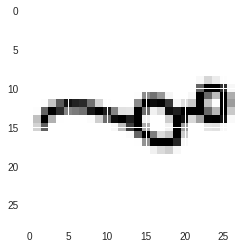

In [20]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [27]:
print(keras.utils.to_categorical([4,1,2,0,3],5))

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [22]:
print(y_train.shape)

(9600, 3)


In [23]:
print(y_train[:10,:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [41]:
model = keras.Sequential()
model.add(layers.Convolution2D(8, (3, 3), padding='same', activation= 'relu',input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(8, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1965      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 18        
Total para

In [43]:
history = model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=25)

Train on 8640 samples, validate on 960 samples
Epoch 1/25
 - 0s - loss: 0.1781 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1827 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/25
 - 0s - loss: 0.1711 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1758 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/25
 - 0s - loss: 0.1679 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1713 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/25
 - 0s - loss: 0.1619 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1679 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/25
 - 0s - loss: 0.1576 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1648 - val_top_k_categorical_accuracy: 1.0000
Epoch 6/25
 - 0s - loss: 0.1539 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1590 - val_top_k_categorical_accuracy: 1.0000
Epoch 7/25
 - 0s - loss: 0.1486 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1568 - val_top_k_categorical_accuracy: 1.0000
Epoch 8/25
 - 0s - loss: 0.1443 - top_k_categorica

In [0]:
history.history.keys()

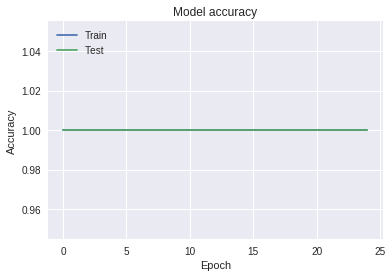

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['top_k_categorical_accuracy'])
plt.plot(history.history['val_top_k_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

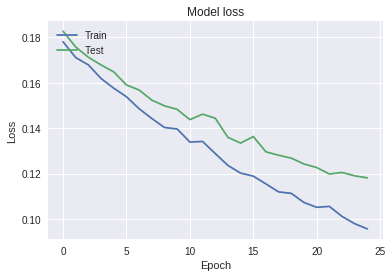

In [45]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [57]:
score = model.evaluate(x_test, y_test[np.random.permutation(y_test.shape[0])], verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 100.00%


In [68]:
model.metrics_names

['loss', 'top_k_categorical_accuracy']

In [58]:
np.random.permutation(y_test.shape[0])

array([1692, 1194, 1436, ..., 1158, 1308, 2114])

In [59]:
print(y_test[:5,])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [60]:
print(y_test[np.random.permutation(y_test.shape[0])][:5,])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


['ladder', 'book']


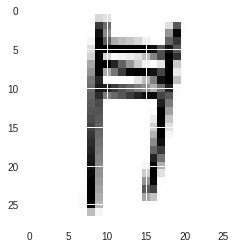

In [66]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:2]
latex = [class_names[x] for x in ind]
print(latex)

In [67]:
preds = model.predict(x_test)
print(preds[:10,])

[[7.0308506e-02 8.5690778e-01 7.2783686e-02]
 [1.0000000e+00 3.8172132e-09 4.3437298e-10]
 [2.2597527e-05 4.3221709e-04 9.9954516e-01]
 [1.0000000e+00 8.0511586e-10 1.6592835e-11]
 [6.7736705e-06 1.3958284e-05 9.9997926e-01]
 [7.7073919e-03 5.9525114e-03 9.8634017e-01]
 [1.6461350e-05 5.0552744e-06 9.9997854e-01]
 [7.0308506e-02 8.5690778e-01 7.2783686e-02]
 [4.0788736e-02 1.7654233e-01 7.8266895e-01]
 [1.0000000e+00 1.1439120e-09 2.4135527e-11]]


In [69]:
print(y_test[:10,])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
